In [1]:
import pandas as pd
import numpy as np

In [16]:
# dataset_path = 'CS170_Spring_2022_Small_data__39.txt' 
dataset_path = 'CS170_Spring_2022_Large_data__39.txt'
# dataset_path = 'small-test-dataset.txt'
# dataset_path = 'Large-test-dataset.txt'

print (f'Using dataset {dataset_path}')
data = []
with open(dataset_path,'r') as f:
    for line in f:
        str_vals = line.strip().split()
        vals = []
        for val in str_vals:
            vals.append(float(val))
        data.append(vals)
import pandas as pd
df = pd.DataFrame(data)
df = df.rename(columns={df.columns[0]:'Class Label'})

def znorm(column):
    return (column - np.mean(column))/np.std(column)

#normalize the stuff
df.iloc[:,1:] = df.iloc[:,1:].apply(znorm)

Using dataset CS170_Spring_2022_Large_data__39.txt


In [17]:
%matplotlib inline

In [18]:
df.head()

,Class Label,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,-0.238840,-0.328411,0.345973,0.958364,1.234402,0.138099,-0.410943,0.273216,1.014775,...,-0.484478,0.446801,0.029906,-0.818470,0.604450,0.047163,1.165394,1.449091,-0.230216,-0.953763
1,2.0,-0.491584,-0.717589,-0.684969,0.486051,1.019278,-0.618924,-0.563122,1.296407,0.313281,...,0.909434,-0.222808,-0.550206,0.610981,-0.303121,0.847398,-1.207053,1.007488,0.524529,-0.667404
2,2.0,-1.249271,2.254462,-1.507062,-0.491130,-2.021473,0.855635,-1.649796,0.374175,1.707998,...,1.808301,-1.048195,-0.286657,-0.530268,0.032797,-0.000815,-1.424494,1.651312,0.357636,-1.184021
3,2.0,-2.462858,-0.081083,1.110650,0.118072,-0.744392,-0.192108,0.462710,-0.822338,0.721852,...,-0.439915,-0.023236,0.271754,-0.462650,0.447885,-0.315930,-0.516702,0.024739,-0.184170,1.666951
4,2.0,-0.833653,-0.890072,0.361147,1.663195,0.659207,1.277767,0.529991,0.175623,0.670521,...,0.610073,-0.508379,-0.173950,-0.543901,0.659172,-0.106075,-0.252781,0.291516,-0.485749,0.140565


In [19]:
df.iloc[:,[0,13,29]]

,Class Label,13,29
0,1.0,2.009371,-0.300811
1,2.0,-1.208788,1.149400
2,2.0,0.906952,0.319740
3,2.0,-0.554129,0.008530
4,2.0,1.088876,-1.424290
...,...,...,...
995,2.0,1.456943,-0.085566
996,2.0,1.375856,-1.788913
997,2.0,1.126329,-1.565186
998,2.0,1.178121,0.122725


In [6]:
df.columns.values[13] = "Feature 1"
df.columns.values[6] = "Feature 6"

<Axes: xlabel='Feature 1', ylabel='Feature 6'>

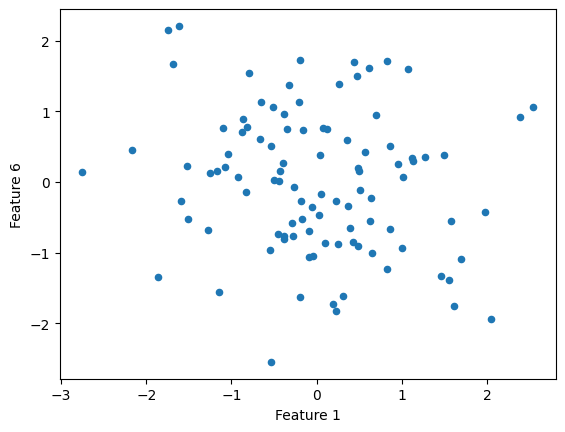

In [7]:
df.iloc[:,[0,1,6]].plot.scatter(x="Feature 1",y="Feature 6")

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

np.random.seed(0)
N = 37
_genders= ['1.0', '2.0']
dft = pd.DataFrame({
    'Feature 13': df.iloc[:,13],
    'Feature 29': df.iloc[:,29],
    'Class': df.iloc[:,0]
})
dft.head()

,Feature 13,Feature 29,Class
0,2.009371,-0.300811,1.0
1,-1.208788,1.149400,2.0
2,0.906952,0.319740,2.0
3,-0.554129,0.008530,2.0
4,1.088876,-1.424290,2.0


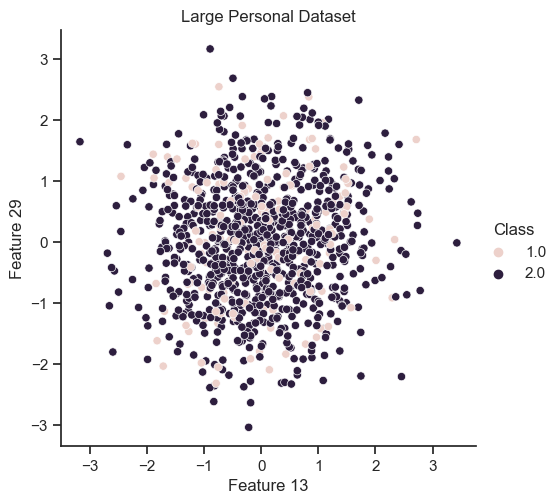

In [22]:
sns.relplot(data=dft, x='Feature 13', y='Feature 29', hue='Class', hue_order=_genders, aspect=1)
plt.title('Large Personal Dataset')
plt.show()